# [Bookmark](#bookmark)

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
import pandas as pd

bos = pd.read_csv('boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [3]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

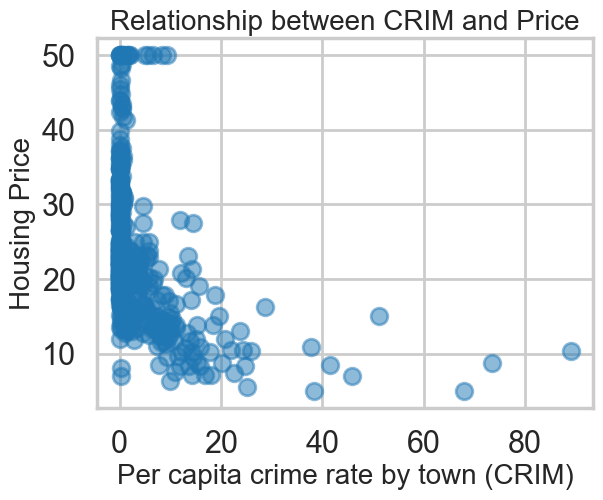

In [5]:
plt.scatter(bos.CRIM, bos.PRICE, alpha=0.5)
plt.xlabel("Per capita crime rate by town (CRIM)", fontsize=20)
plt.ylabel("Housing Price", fontsize=20)
plt.title("Relationship between CRIM and Price", fontsize=20)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

<div class="alert alert-block alert-success">
<b>your turn: describe relationship</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Housing price decreases as CRIM increases. The relationship is <b>negative</b> and appears linear; however, it could be exponentially decreasing.<br>One notable feature about the graph is that houses from all price ranges are represented at around 0 crimes per capita, which could indicate that crime is generally low in Boston and its suburbs.<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Also, houses at the \$50,000 mark are represented in the data until the crime rate reaches around 10 per capita. Beyond this point, the maximum price is \$30,000 and steadily decreases from there.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are few outliers visible in this scatterplot.
</div>

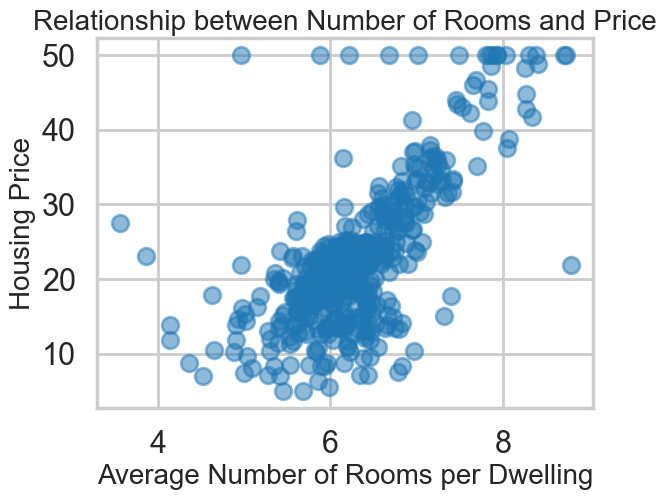

In [6]:
# your turn: scatter plot between *RM* and *PRICE*

plt.scatter(bos.RM, bos.PRICE, alpha=0.5)
plt.xlabel("Average Number of Rooms per Dwelling", fontsize=20)
plt.ylabel("Housing Price", fontsize=20)
plt.title("Relationship between Number of Rooms and Price", fontsize=20)
plt.show()

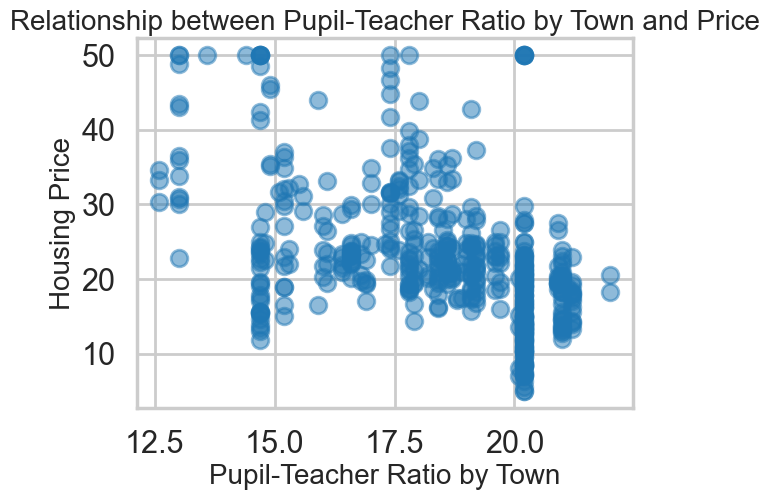

In [7]:
# your turn: scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.PRICE, alpha=0.5)
plt.xlabel("Pupil-Teacher Ratio by Town", fontsize=20)
plt.ylabel("Housing Price", fontsize=20)
plt.title("Relationship between Pupil-Teacher Ratio by Town and Price", fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
<b>What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I am interested in seeing the variables NOX (nitric oxides concentration per parts 10 million) and RAD (index of accessibility to radial highways) plotted against price. I think these are interesting variables because they might indicate what home buyers value in a property, since people are generally willing to pay a premium for things they value. I have written my observations on these graphs below:<br>
    <h4>Relationship NOX and Price</h4>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our scatterplot for NOX and price shows a strong increasing linear relationship: as NOX increases, housing price also increases. This might seem surprising, since high NOX levels indicate poor air quality. However, we would expect NOX levels to be higher in urban areas due to higher levels of traffic and, consequently, higher levels of combustion emissions from vehicles. This graph seems to indicate that people are willing to pay more to live closer to larger cities (in this case, Boston).<br>
    <h4>Relationship AGE and Price</h4>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our scatterplot for AGE and price shows a weak decreasing linear relationship: as AGE increases, price decreases. This indicates that older neighborhoods tend to have lower property values. This could be due to older homes having outdated amenities, making them less desirable to potential buyers. Additionally, older houses tend to require more maintenance and upkeep than newer ones.
</div>

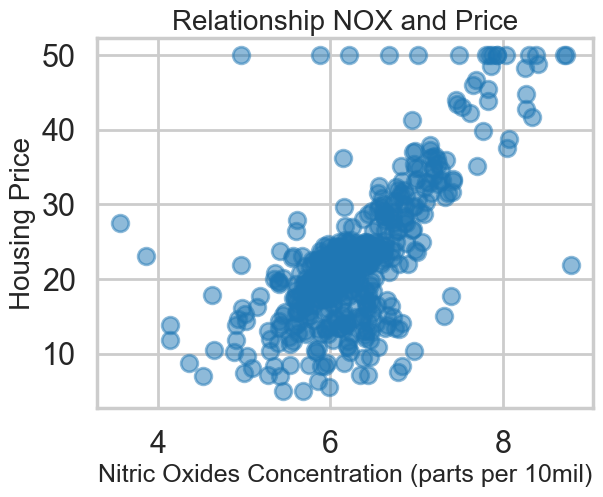

In [8]:
# your turn: create some other scatter plots

# NOX vs. Price
plt.scatter(bos.RM, bos.PRICE, alpha=0.5)
plt.xlabel("Nitric Oxides Concentration (parts per 10mil)", fontsize=18)
plt.ylabel("Housing Price", fontsize=20)
plt.title("Relationship NOX and Price", fontsize=20)
plt.show()

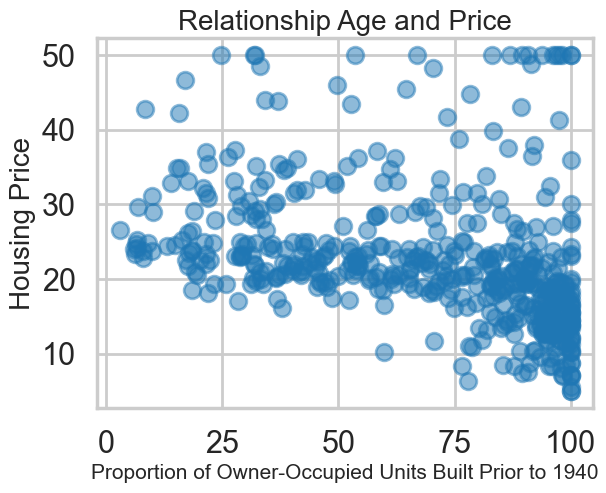

In [9]:
# Age vs. Price
plt.scatter(bos.AGE, bos.PRICE, alpha=0.5)
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940", fontsize=15)
plt.ylabel("Housing Price", fontsize=20)
plt.title("Relationship Age and Price", fontsize=20)
plt.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

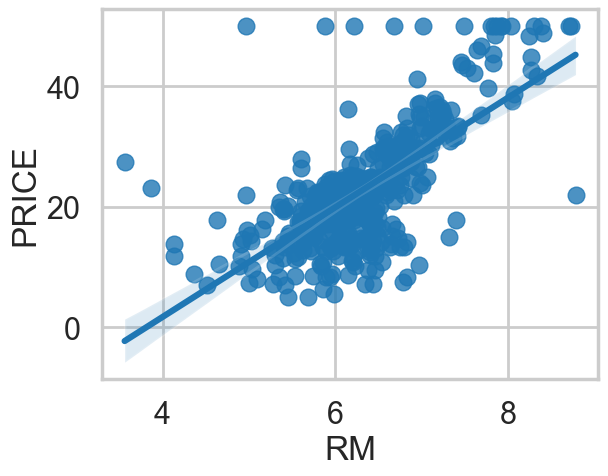

In [10]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


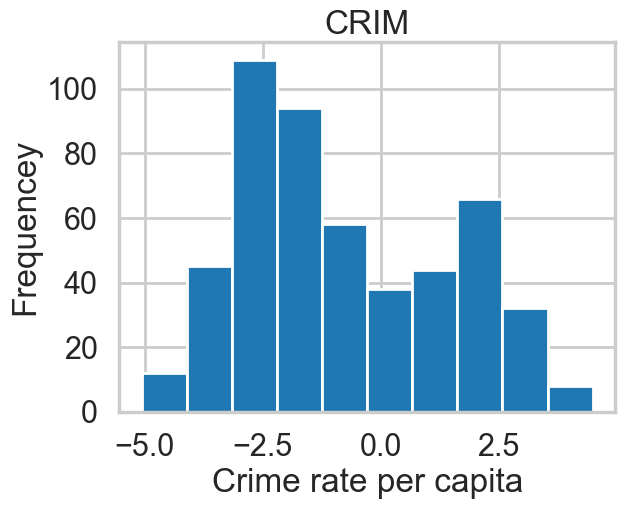

In [11]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Without applying a log transformation to the crime rate data, our histogram is extremely right-skewed and therefore difficult to interpret. By taking a log transformation, we can reveal patterns in the data that we might otherwise not have seen. Notably, the log transformation reveals a bimodal distribution in the crime rate histogram, which is not immediately apparent in the original data.
</div>

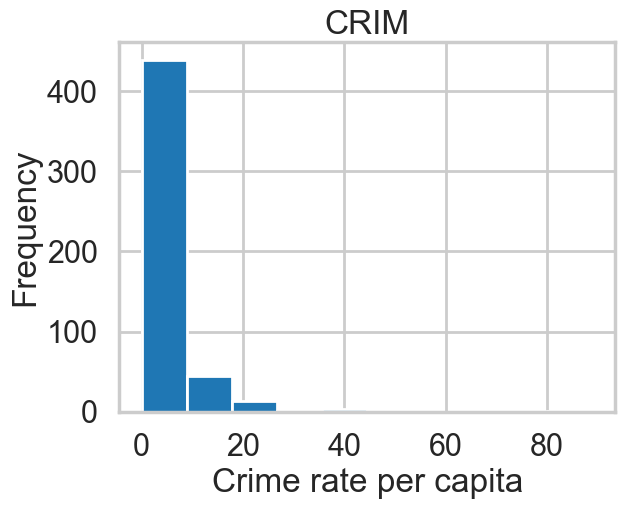

In [12]:
# Histogram WITHOUT log
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since histograms are not used for visualizing correlations, I assume I am being asked to simply plot the histograms for these variables and check whether these graphs resemble each other. While histograms are not expressly used to visualize correlations between two variables, similarities between two histograms could indicate some underlying relationship. (If two variables show similarly-shaped distributions, for example, that could mean they are related.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In addition to RM and PTRATIO, we have also plotted histograms of NOX and AGE. All four histograms have distinctly shaped distributions, however, with no two histograms resembling one another. Based on this information, we can infer that there are no correlations among these variables as predictors.
</div>

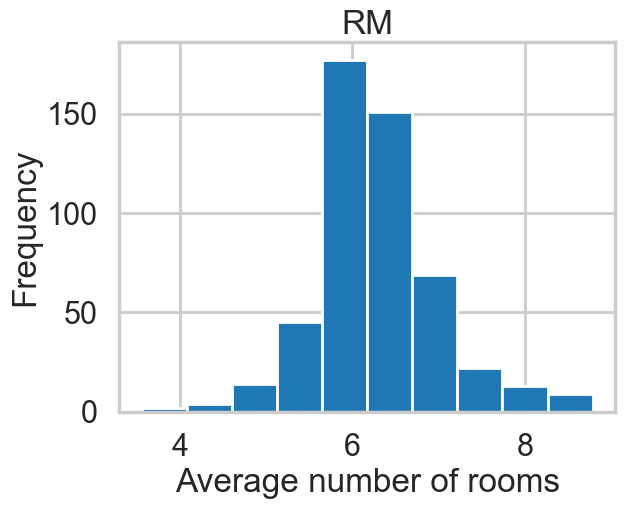

In [13]:
# RM histogram
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms")
plt.ylabel("Frequency")
plt.show()

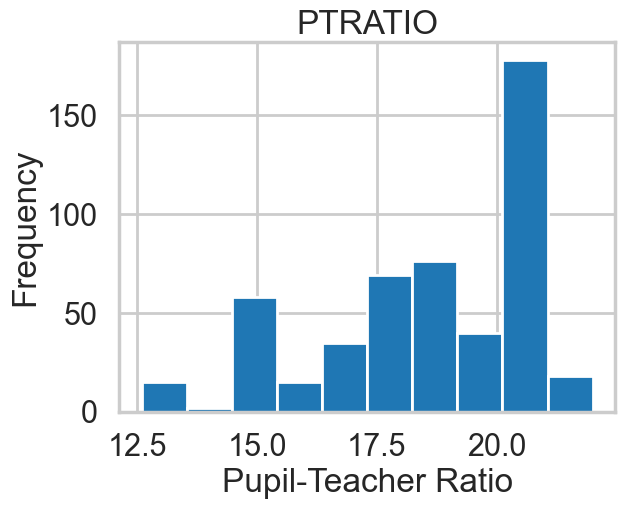

In [14]:
# PTRATIO histogram
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

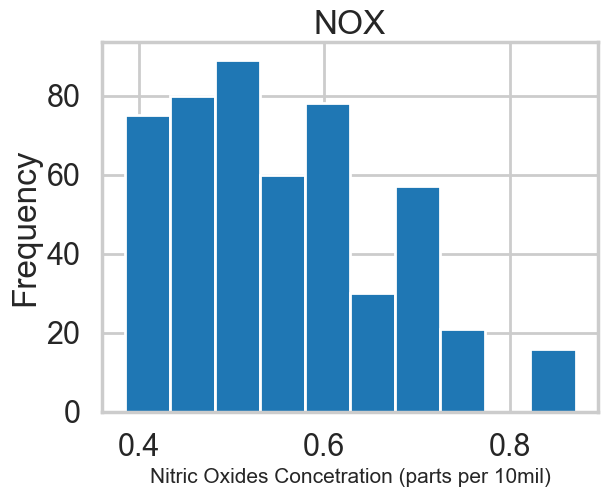

In [15]:
# NOX histogram
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("Nitric Oxides Concetration (parts per 10mil)", fontsize=15)
plt.ylabel("Frequency")
plt.show()

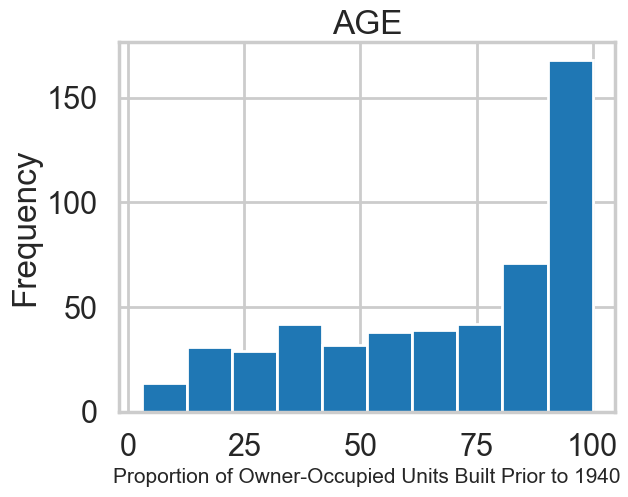

In [16]:
# AGE histogram
plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940", fontsize=15)
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [17]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.49e-74
Time:                        21:26:05   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

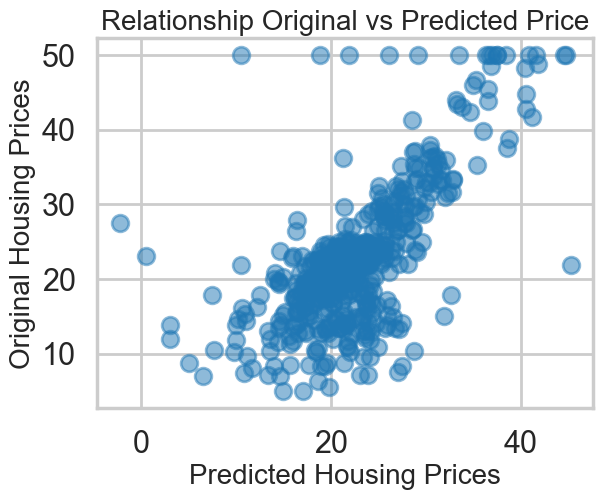

In [19]:
# your turn
plt.scatter(m.fittedvalues, bos.PRICE, alpha=0.5)
plt.xlabel("Predicted Housing Prices", fontsize=20)
plt.ylabel("Original Housing Prices", fontsize=20)
plt.title("Relationship Original vs Predicted Price", fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The scatterplot shows an increasing linear relationship between original and predicted house prices, which is what we would expect to see if our model is working as intended.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are a few interesting features about this scatterplot. Perhaps most notably, there is a predicted price that is <i>below</i> \$0, so our model predicted a negative price in one instance.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, there are several houses whose original price is \$50,000 that have predicted prices across a range of values, starting around \$10,000 and going up to over \$40,000. However, interestingly, in no case does a house whose original price is $50,000 have a predicted price of \$50,000. In fact, no houses have a predicted price of \$50,000.
</div>

### Fitting Linear Regression using `sklearn`


In [20]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

<div class="span5 alert alert-danger">
Note that we need to fit the model `lm` in order for methods `coef_` or `intercept_` to work. For this reason, I will be running these cells out of order. I will first run the cell in which we fit the model, which is a few cells below this one. I will then run the cell directly below this one.
</div>

In [22]:
# Look inside lm object
print(f"Estimated Coefficients: {lm.coef_}")
print(f"Estimated Intercept: {lm.intercept_}")

Estimated Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Estimated Intercept: 36.45948838508985


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [21]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look <a href="https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/">here</a>.</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<div class="alert alert-block alert-success"> 
<h4>Exercise</h4><br>
<b>How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To make the linear regression model not fit an intercept form, we would adjust the linear regression object to have the parameter `fit_intercept=False` as follows:
</div>

```
lm = LinearRegression(fit_intercept=False)
```

<div class="alert alert-block alert-success"> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, in our case, we will <b>not</b> be removing the intercept. The intercept provides us a baseline price for a house in the theoretical (if unrealistic) case that all other variables are equal to 0.
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;While it is necessary for the residuals to be independent, identically distributed, and normally distributed in our case, normally distributed residuals do not automatically imply that they are also independent and identically distributed.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Even if the residuals are normally distributed, it is still possible that a correlation could exist between the residuals. Additionally, variance across predictor values might not be constant, which would mean the residuals are not identically distributed.
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</b><br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>False.</b> The <b>residuals</b> need to be normally distributed rather than the $Y$ values.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To use linear regression, there must be a linear relationship between the predictor variables and $Y$.
</div>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [23]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508985


In [24]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [25]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [26]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The histogram for predicted prices shows a relatively normal distribution, with most prices concentrated around the value of \$20,000. The spread of the graph is wide.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our histogram shows an outlier that is less than \$0. This could be due to data quality issues in the training data; however, since there were no negative prices in our original data, this might point to an issue with multicollinearity among the predictor variables.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We might reassess the predictor variables that we are using in our model and remove any that would contribute to multicollinearity.
</div>

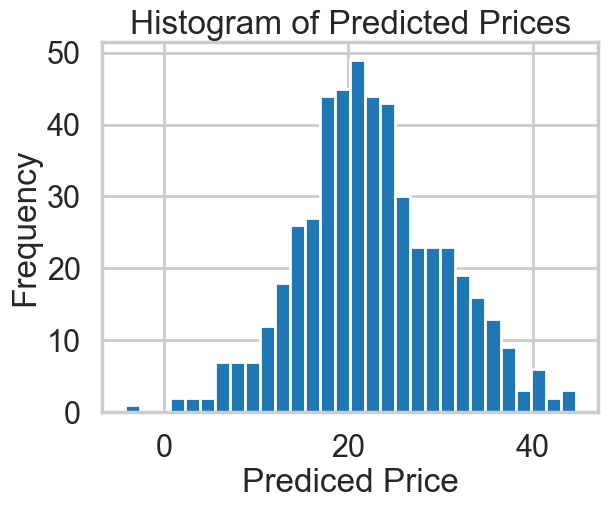

In [27]:
# Histogram
predicted_prices = lm.predict(X)

plt.hist(predicted_prices, bins=30)
plt.title("Histogram of Predicted Prices")
plt.xlabel("Prediced Price")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Calculating spread
# The spread of our graph can be considered narrow if the standard deviation is < 10% of the mean. Otherwise, it is wide.
np.std(predicted_prices)/np.mean(predicted_prices)

0.3509220124091928

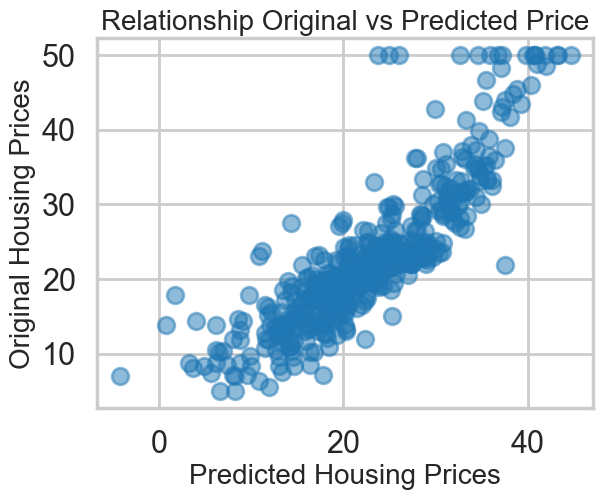

In [29]:
# Scatterplot
# Plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

plt.scatter(predicted_prices, bos.PRICE, alpha=0.5)
plt.xlabel("Predicted Housing Prices", fontsize=20)
plt.ylabel("Original Housing Prices", fontsize=20)
plt.title("Relationship Original vs Predicted Price", fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The package statsmodels is performs best for statistical tasks and analyzing underlying relationships in the data. For example, earlier in this notebook, statsmodels was used to create a detailed summary of our OLS Regression Results. On the other hand, scikit-learn is better suited to machine-learning tasks and does not provide detailed statistical output on the same level as statsmodels.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The statistical output provided by statsmodels is useful for detailed analysis and interpretation of our model as well as diagnostic purposes.
</div>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [30]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [31]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064765


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>  <a name="bookmark"></a>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The intercept of our PTRATIO linear regression model is 62.34, meaning that our model predicts that a house with a student-teacher ratio of 0 would be $62,340.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The coefficient of our PTRATIO linear regression model is -2.16, meaning that, for each additional student per teacher, the price of a home is expected to decrease by \$2,000.
</div>

In [32]:
X = bos[['PTRATIO']]
y = bos['PRICE']

lm = LinearRegression()

lm.fit(X, y)

print(f"Coefficient for PTRATIO:{lm.coef_[0]}\nIntercept: {lm.intercept_}")

Coefficient for PTRATIO:-2.157175296060961
Intercept: 62.34462747483259


<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Calculate (or extract) the $R^2$ value. What does it tell you?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We have an $R^2$ value of 0.26, meaning that 26% of the variance in house prices can be explained by the PTRATIO.
</div>

In [33]:
print(f"R-squared: {lm.score(X, y)}")

R-squared: 0.257847318009223


<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Compute the $F$-statistic. What does it tell you?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our F-statistic is 175.11, suggesting that the model using PTRATIO to predict price significantly explains variabliity in housing prices. Since our p-value is nearly 0, the likelihood of observing an F-statistic of this magnitude by chance is extremely rare.
</div>

In [34]:
# Compute the F-statistic
X = bos[['PTRATIO']]
y = bos['PRICE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(f"F-statistic: {model.fvalue}\np-value for F-statistic: {model.f_pvalue}")

F-statistic: 175.10554287569545
p-value for F-statistic: 1.6095094784730473e-34


<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The $F$-statistic is 175.1 while the $t$-statistic is -13.233. Notably, the $F$-statistic is approximately equal to the value of the $t$-statistic, squared.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In mathematical terms:
$$
F = (-13.233)^2 \approx 175.11
$$
</div>

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.61e-34
Time:                        21:26:18   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

<div class="alert alert-block alert-success">
<b>Compute or extract the $F$-statistic. What does it tell you about the model?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>The $F$-statistic is 245.2. This tells us that at least one of the three predictor variables - CRIM, RM, and PTRATIO - has a significant relationship to PRICE. This is higher than our model which used PTRATIO alone as a predictor variable, which indicates that the additional variables - CRIM and RM - significantly improve our model.<br><br>
<b>Compute or extract the $R^2$-statistic. What does it tell you about the model?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>Our $R^2$ value is 0.594, meaning that 59.4% of the variance in housing price is explained by CRIM, RM, and PTRATIO together.<br><br>
<b>Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>According to our summary table, the $p$-values for all three of our predictor variables, CRIM, RM, and PTRATIO, are less than 0.05, which means that each of these variables is a statistically significant factor in predicting house prices.<br><br>
The coefficients for each predictor also tell us that:
<ul>
  <li>For each additional unit increase in CRIM, house prices are predicted to decrease by \$205.</li>
  <li>For each additional room, house prices are predicted to increase by \$7,380.</li>
  <li>For each additional student per teacher, housing prices are predicted to decrease by \$1,070.</li>
</ul> 
</div>

In [36]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos['PRICE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.15e-98
Time:                        21:26:19   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I added the variable LSTAT, which represents the "proportion of the popluation that is lower status."<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to our model summary, the $F$-statistic is 268 while the AIC is 3112. These are considerably stronger measures than our model which used CRIM, RM, and PTRATIO alone, whose $F$-statistic and AIC were 245.2 and 3232, respectively, since our $F$-statistic is higher while our AIC is lower.<br>
</div>

In [37]:
X = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT']]
y = bos['PRICE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          5.84e-123
Time:                        21:26:20   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9233      3.976      4.257      0.000       9.112      24.734
CRIM          -0.0654      0.031     -2.124      0.034      -0.126      -0.005
RM             4.6186      0.427     10.812      0.000       3.779       5.458
PTRATIO       -0.8897      0.119     -7.487      0.000      -1.123      -0.656
LSTAT         -0.5343      0.046    -11.708      0.000      -0.624      -0.445
==============================================================================
Omnibus:                      219.815   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.115
Skew:                           1.840   Prob(JB):                    1.14e-265
Kurtosis:                       9.658   Cond. No.                         417.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
    <li><b>Linearity</b>. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
    <li><b>Constant standard deviation</b>. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
    <li> <b>Normal distribution for errors</b>.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
    <li> <b>Independent errors</b>.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
    <li><b>Correlated Predictors:</b> Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
    <li><b>Influential Points:</b> Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at <a href="http://mpastell.com/2013/04/19/python_regression/">this blog post</a> for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The residuals are randomly scattered around 0 with no clear pattern. Therefore, the linear regression model is appropriate for our data, and no model assumptions are violated.
</div>

In [38]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos['PRICE']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [39]:
fitted_vals = model.fittedvalues
residuals = model.resid

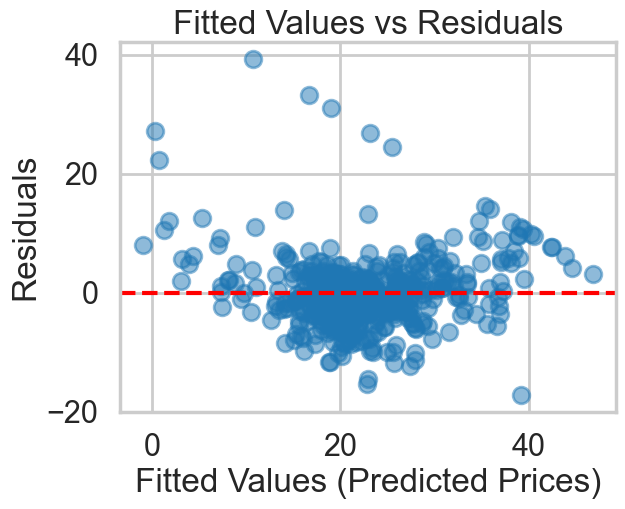

In [40]:
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Construct a quantile plot of the residuals. What does the plot tell you?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Q-Q plot shows that values lay relatively close to the 45-degree line; however, the graph exhibits slight curvature, and there are some values that fall above the line on the right side. The slight curvature of the graph suggests that the residuals do not follow a perfectly normal distribution, while the values that fall above the right-hand side of the line indicate that there are fewer extreme high values than expected.
</div>

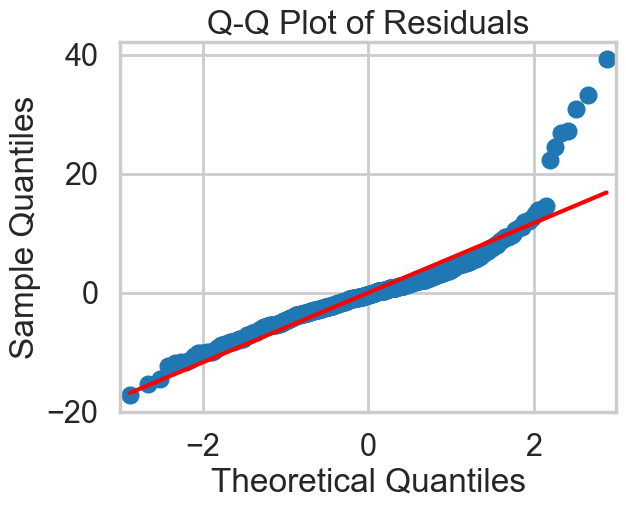

In [41]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our fitted vs. residuals plot is better for detecting heteroscedasticity, while our Q-Q plot provides no such insight. Meanwhile, our Q-Q plot is better suited for assessing whether our residuals are normally distributed, as well as whether there are any outliers.
</div>

<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</b><br>
Based on summary statistics computed below, these outlier houses tend to have the following characteristics:
<ul>
    <li><b>Lower than average ZN (proportion of residential land zoned for lots over 25,000 sq ft.):</b> Outlier houses tend to be smaller.</li>
    <li><b>Higher than average INDUS (proportion of non-retail business acres per town):</b> Outlier houses tend to be located in more industrial areas.</li>
    <li><b>Higher than average NOX (nitric oxides concentration (parts per 10 million)):</b> Outlier houses are located in areas with higher concentrations of nitric oxides.</li>
    <li><b>Higher than average AGE:</b> Outlier houses tend to be located in older neighborhoods.</li>
    <li><b>Lower than average DIS (weighted distances to five Boston employment centers):</b> Outlier houses are in locations closer to Boston employment centers.</li>
    <li><b>Higher than average RAD (index of accessibility to radial highways):</b> Outlier houses are closer to highways leading into Boston or other urban areas.</li>
</ul> 
High industrialization, higher nitric oxides concentration, high accessibility to highways leading to urban areas, and close proximity to Boston employment centers could imply that these outlier houses are either located in, or are very close to, Boston.
</div>

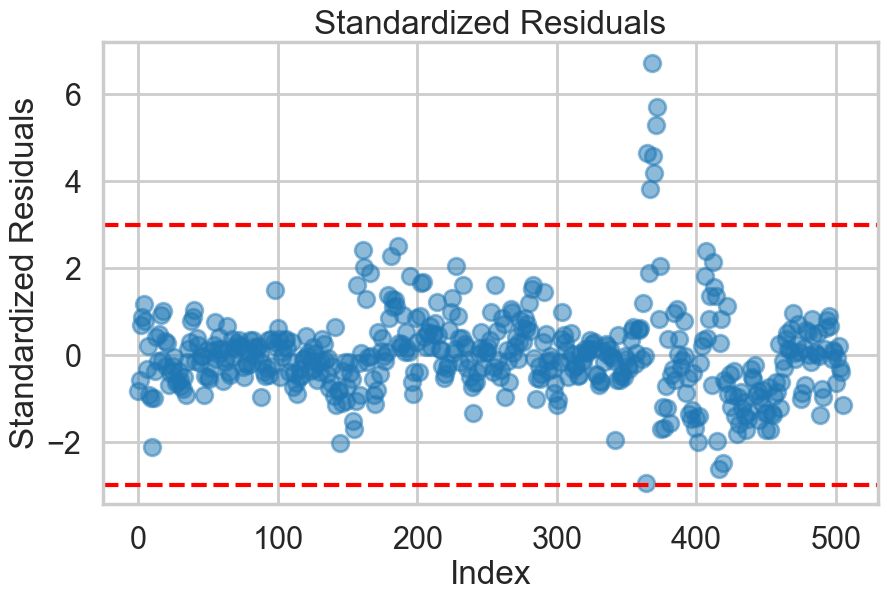

Outlier indices: [365 367 368 369 370 371 372]


In [42]:
standardized_residuals = residuals / np.std(residuals)

outliers = np.where(np.abs(standardized_residuals) > 3)[0]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(standardized_residuals)), standardized_residuals, alpha=0.5)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Standardized Residuals')
plt.xlabel('Index')
plt.ylabel('Standardized Residuals')
plt.show()

print("Outlier indices:", outliers)

In [46]:
outlier_houses = bos.iloc[outliers]
outlier_houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


In [53]:
outlier_houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,7.000000,7.0,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.000000,7.000000,7.000000
mean,7.526369,0.0,1.810000e+01,0.428571,0.648714,5.454857,95.971429,1.330586,24.0,666.0,20.2,334.721429,6.972857,42.942857
std,3.150706,0.0,3.837369e-15,0.534522,0.033520,1.357519,5.122732,0.180677,0.0,0.0,0.0,90.821860,3.894773,12.119111
min,4.555870,0.0,1.810000e+01,0.000000,0.631000,3.561000,87.900000,1.129600,24.0,666.0,20.2,131.420000,2.960000,23.100000
25%,5.284100,0.0,1.810000e+01,0.000000,0.631000,4.416500,93.200000,1.185750,24.0,666.0,20.2,351.290000,3.495000,38.750000
50%,6.538760,0.0,1.810000e+01,0.000000,0.631000,5.875000,97.500000,1.332500,24.0,666.0,20.2,366.150000,7.120000,50.000000
75%,8.749775,0.0,1.810000e+01,1.000000,0.649500,6.449500,100.000000,1.433650,24.0,666.0,20.2,375.425000,9.205000,50.000000
max,13.522200,0.0,1.810000e+01,1.000000,0.718000,7.016000,100.000000,1.613200,24.0,666.0,20.2,392.050000,13.330000,50.000000


In [56]:
bos.drop(outliers).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.558634,11.523046,11.039098,0.064128,0.553376,6.296275,68.190581,3.829614,9.346693,404.621242,18.431062,356.981984,12.732745,22.246493
std,8.642264,23.446576,6.858199,0.245227,0.116090,0.684539,28.151050,2.099852,8.596841,166.904173,2.170137,91.354571,7.146251,8.835644
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081005,0.000000,5.130000,0.000000,0.448500,5.888000,44.050000,2.111400,4.000000,279.000000,17.150000,376.125000,7.075000,16.800000
50%,0.249800,0.000000,8.560000,0.000000,0.538000,6.209000,76.700000,3.272100,5.000000,330.000000,19.000000,391.700000,11.450000,21.100000
75%,3.242325,12.500000,18.100000,0.000000,0.624000,6.622000,93.850000,5.214600,16.000000,666.000000,20.200000,396.260000,17.095000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</b><br>
There are 46 total houses that we consider to be high leverage points in our model. Here are a few notable examples, and possible reasons for their high leverage:
<ul>
    <li>One house (at index 97) has a high PTRATIO, but a lower than average crime rate (0.12) and a large number of rooms (8). The combination of a large number of rooms and low crime in an area with a high PTRATIO could explain why this house exerts more influence on the model.</li>
    <li>One house (at index 364) had a high PTRATIO (20.2) and an average crime rate, but a higher number of rooms (9) than average. The high number of rooms coupled with a high PTRATIO could explain its high leverage in the model.</li>
    <li>One house (at index 365) had an average crime rate, high PTRATIO (20.2), but a low number of rooms (4). This combination of factors makes it stand out in the data, increasing its leverage in the model.</li>
</ul> 
</div>

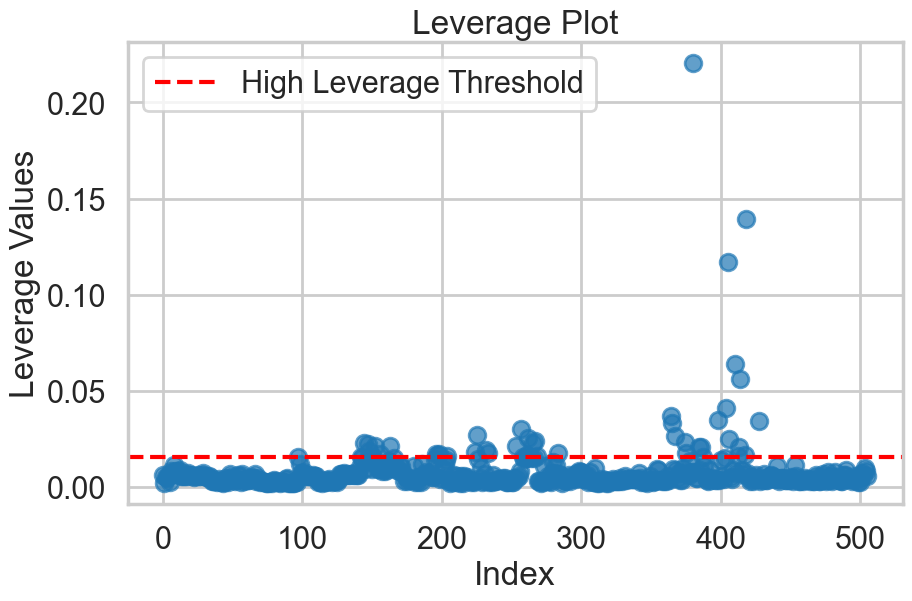

High leverage points: [ 97 142 144 147 148 151 152 156 163 196 197 198 204 224 225 232 233 253
 257 258 261 262 263 265 267 268 283 364 365 367 374 375 380 384 386 398
 404 405 406 410 412 413 414 417 418 427]


In [43]:
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

leverage = model.get_influence().hat_matrix_diag

plt.figure(figsize=(10, 6))
plt.scatter(range(len(leverage)), leverage, alpha=0.7)
plt.axhline(y=2 * (X_with_const.shape[1] / X_with_const.shape[0]), color='r', linestyle='--', label='High Leverage Threshold')
plt.title('Leverage Plot')
plt.xlabel('Index')
plt.ylabel('Leverage Values')
plt.legend()
plt.show()

high_leverage_points = np.where(leverage > 2 * (X_with_const.shape[1] / X_with_const.shape[0]))[0]
print("High leverage points:", high_leverage_points)

In [66]:
high_leverage_houses = bos.iloc[high_leverage_points]
high_leverage_houses[['CRIM', 'RM', 'PTRATIO', 'PRICE']]

,CRIM,RM,PTRATIO,PRICE
97,0.12083,8.069,18.0,38.7
142,3.32105,5.403,14.7,13.4
144,2.77974,4.903,14.7,11.8
147,2.36862,4.926,14.7,14.6
148,2.33099,5.186,14.7,17.8
151,1.49632,5.404,14.7,19.6
152,1.12658,5.012,14.7,15.3
156,2.44668,5.272,14.7,13.1
163,1.51902,8.375,14.7,50.0
196,0.04011,7.287,12.6,33.3


In [68]:
bos.drop(high_leverage_points)[['CRIM', 'RM', 'PTRATIO', 'PRICE']]

,CRIM,RM,PTRATIO,PRICE
0,0.00632,6.575,15.3,24.0
1,0.02731,6.421,17.8,21.6
2,0.02729,7.185,17.8,34.7
3,0.03237,6.998,18.7,33.4
4,0.06905,7.147,18.7,36.2
...,...,...,...,...
501,0.06263,6.593,21.0,22.4
502,0.04527,6.120,21.0,20.6
503,0.06076,6.976,21.0,23.9
504,0.10959,6.794,21.0,22.0


In [69]:
high_leverage_houses[['CRIM', 'RM', 'PTRATIO', 'PRICE']].describe()

,CRIM,RM,PTRATIO,PRICE
count,46.000000,46.000000,46.000000,46.000000
mean,14.520440,6.404087,16.917391,25.934783
std,22.022091,1.584771,3.146589,15.739705
min,0.015010,3.561000,12.600000,5.000000
25%,0.535715,5.162750,13.875000,12.200000
50%,2.349805,6.079500,17.400000,20.750000
75%,20.558375,8.006250,20.200000,42.525000
max,88.976200,8.780000,20.200000,50.000000


In [70]:
bos.drop(high_leverage_points)[['CRIM', 'RM', 'PTRATIO', 'PRICE']].describe()

,CRIM,RM,PTRATIO,PRICE
count,460.000000,460.000000,460.000000,460.000000
mean,2.522832,6.272689,18.609348,22.192609
std,4.554210,0.543458,1.981213,8.215832
min,0.006320,4.880000,13.000000,5.600000
25%,0.078832,5.913750,17.400000,17.400000
50%,0.212850,6.209000,19.100000,21.200000
75%,2.755072,6.569000,20.200000,24.800000
max,25.046100,8.040000,22.000000,50.000000


<div class="alert alert-block alert-success">
<h4>Exercise</h4><br>
<b>Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
After removing outliers and high-leverage points, a couple of our observations have changed:
<ul>
    <li>$R^2$ increased, meaning the model better explains a larger portion of the variance in house prices in our data.</li>
    <li>$F$-statistic increased,  meaning the model's significance has increased overall.</li>
    <li>Coefficients have changed. Specifically, higher crime rates result in a steeper decrease in price, higher PTRATIO causes a smaller decrease in house price, and more rooms in houses result in slightly larger price increases.</li>
</ul>
</div>

In [57]:
leverage = model.get_influence().hat_matrix_diag
high_leverage_threshold = 2 * (X_with_const.shape[1] / X_with_const.shape[0])
high_leverage_points = np.where(leverage > high_leverage_threshold)[0]

to_remove = np.unique(np.concatenate([outliers, high_leverage_points]))
bos_cleaned = bos.drop(bos.index[to_remove])

X_cleaned = bos_cleaned[['CRIM', 'RM', 'PTRATIO']]
y_cleaned = bos_cleaned['PRICE']
X_cleaned_with_const = sm.add_constant(X_cleaned)
new_model = sm.OLS(y_cleaned, X_cleaned_with_const).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.15e-98
Time:                        23:22:44   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     363.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          6.91e-120
Time:                        23:03:16   Log-Likelihood:                -1295.7
No. Observations:                 455   AIC:                             2599.
Df Residuals:                     451   BIC:                             2616.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7346      3.631     -3.507      0.000     -19.871      -5.599
CRIM          -0.5357      0.046    -11.528      0.000      -0.627      -0.444
RM             8.3653      0.388     21.577      0.000       7.603       9.127
PTRATIO       -0.8895      0.112     -7.977      0.000      -1.109      -0.670
==============================================================================
Omnibus:                       32.760   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.207
Skew:                           0.476   Prob(JB):                     6.24e-13
Kurtosis:                       4.435   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""